In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # Красивые графики

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 50)

data_train = pd.read_csv('stroke_train.csv')
data_test = pd.read_csv('stroke_test.csv')

data_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,15784,Female,33.0,0,0,Yes,Private,Rural,79.53,23.1,never smoked,0
1,16049,Male,48.0,0,0,Yes,Govt_job,Rural,74.12,NaN,smokes,0
2,23616,Female,32.0,0,0,No,Private,Urban,69.83,22.0,never smoked,0
3,52824,Female,59.0,0,0,Yes,Private,Rural,146.97,30.1,never smoked,0
4,22322,Female,31.0,0,0,No,Private,Rural,69.27,28.9,NaN,0


In [201]:
print('Shape of data train', data_train.shape)
print('Shape of data test', data_test.shape)

Shape of data train (20832, 12)
Shape of data test (5208, 12)


In [202]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20832 entries, 0 to 20831
Data columns (total 12 columns):
id                   20832 non-null int64
gender               20832 non-null object
age                  20832 non-null float64
hypertension         20832 non-null int64
heart_disease        20832 non-null int64
ever_married         20832 non-null object
work_type            20832 non-null object
Residence_type       20832 non-null object
avg_glucose_level    20832 non-null float64
bmi                  20151 non-null float64
smoking_status       14463 non-null object
stroke               20832 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.9+ MB


In [343]:
data_train.dtypes

id                     int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type             object
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [203]:
data_train[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,20832.000000,20832.000000,20832.000000,20832.000000,20151.000000
mean,42.269677,0.093126,0.049395,104.357774,28.599687
std,22.562275,0.290616,0.216697,43.259818,7.783798
min,0.080000,0.000000,0.000000,55.000000,10.100000
25%,24.000000,0.000000,0.000000,77.390000,23.200000
50%,44.000000,0.000000,0.000000,91.320000,27.700000
75%,60.000000,0.000000,0.000000,111.470000,32.900000
max,82.000000,1.000000,1.000000,281.590000,96.100000


In [204]:
print('Missing of data\n', data_train.isna().sum())
print('Missing of data\n', data_test.isna().sum())

Missing of data
 id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   681
smoking_status       6369
stroke                  0
dtype: int64
Missing of data
 id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   164
smoking_status       1577
stroke                  0
dtype: int64


## 1. Подготовка данных

### 1. Gender

Female    12314
Male       8514
Other         4
Name: gender, dtype: int64


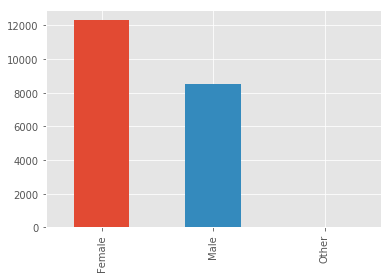

In [205]:
print(data_train['gender'].value_counts())
data_train['gender'].value_counts().plot(kind='bar')


In [206]:
data_train.loc[data_train['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2397,49812,Other,53.0,0,0,Yes,Govt_job,Urban,65.29,NaN,NaN,0
8984,42452,Other,10.0,0,0,No,children,Rural,72.05,21.2,formerly smoked,0
9320,13471,Other,39.0,0,0,Yes,Govt_job,Urban,95.59,32.0,formerly smoked,0
18411,26188,Other,46.0,0,0,No,Private,Rural,83.28,NaN,never smoked,0


In [207]:
# Other - удаляем, потому что относятся к классу "0"
#Заменяем на 0 и 1
data_train['gender'].replace(to_replace='Male', value=1, inplace=True)
data_train['gender'].replace(to_replace='Female', value=0, inplace=True)
data_train.drop(data_train[data_train['gender'] == 'Other'].index, inplace=True) 
data_train['gender'].value_counts()

0    12314
1     8514
Name: gender, dtype: int64

In [208]:
data_test['gender'].replace(to_replace='Male', value=1, inplace=True)
data_test['gender'].replace(to_replace='Female', value=0, inplace=True)
data_test.drop(data_test[data_test['gender'] == 'Other'].index, inplace=True)
data_test['gender'].value_counts()

0    3142
1    2065
Name: gender, dtype: int64

In [209]:
print('Размер данных тренировочной выборки: ', data_train['gender'].shape)
print('Размер данных тестовой выборки:      ', data_test['gender'].shape)
print('Целевая функция (1): ', data_train.loc[data_train['stroke'] == 1].shape)

Размер данных тренировочной выборки:  (20828,)
Размер данных тестовой выборки:       (5207,)
Целевая функция (1):  (376, 12)


In [256]:
#Переводим к типу int
data_train['gender'] = data_train['gender'].astype(int)
data_test['gender'] = data_test['gender'].astype(int)

### 2. Age

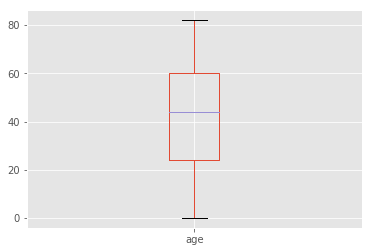

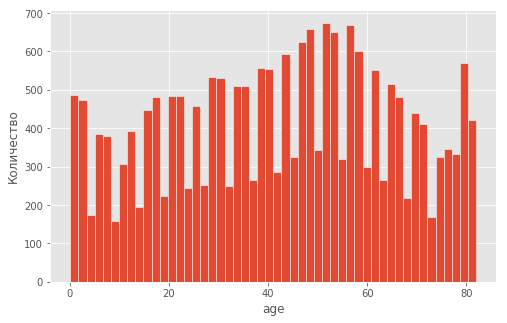

In [211]:
data_train[['age']].plot.box()

plt.figure(figsize=(8, 5))
plt.hist(data_train['age'], 50, edgecolor='white')
plt.xlabel('age')
plt.ylabel('Количество')
plt.grid(True)

### 3. Hypertension

0    18888
1     1940
Name: hypertension, dtype: int64
(20828,)


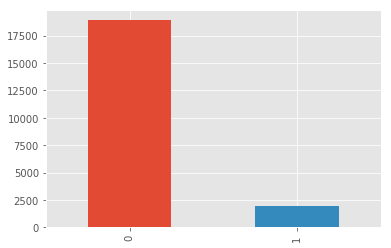

In [212]:
#Все нормально
print(data_train['hypertension'].value_counts())
print(data_train['hypertension'].shape)
data_train['hypertension'].value_counts().plot(kind='bar')

### 4. Heart Disease

0    19799
1     1029
Name: heart_disease, dtype: int64
(20828,)


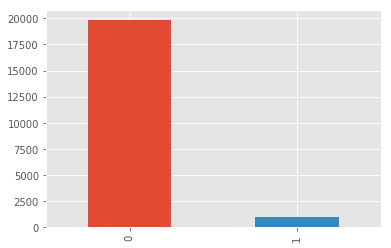

In [213]:
#Все нормально
print(data_train['heart_disease'].value_counts())
print(data_train['heart_disease'].shape)
data_train['heart_disease'].value_counts().plot(kind='bar')


### 5. Ever married

Yes    13503
No      7325
Name: ever_married, dtype: int64
(20828,)


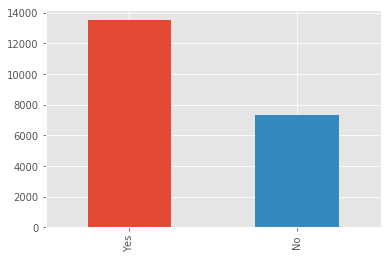

In [214]:
#Все нормально
print(data_train['ever_married'].value_counts())
print(data_train['ever_married'].shape)
data_train['ever_married'].value_counts().plot(kind='bar')

In [215]:
# Заменяем на 1 и 0
data_train['ever_married'].replace(to_replace='Yes', value=1, inplace=True)
data_train['ever_married'].replace(to_replace='No', value=0, inplace=True)
print('Value counts after:\r\n',data_train['ever_married'].value_counts())

data_test['ever_married'].replace(to_replace='Yes', value=1, inplace=True)
data_test['ever_married'].replace(to_replace='No', value=0, inplace=True)
print('Value counts after:\r\n',data_test['ever_married'].value_counts())

Value counts after:
 1    13503
0     7325
Name: ever_married, dtype: int64
Value counts after:
 1    3356
0    1851
Name: ever_married, dtype: int64


### 6. Work type

Private          11931
Self-employed     3229
children          2957
Govt_job          2632
Never_worked        79
Name: work_type, dtype: int64
(20828,)


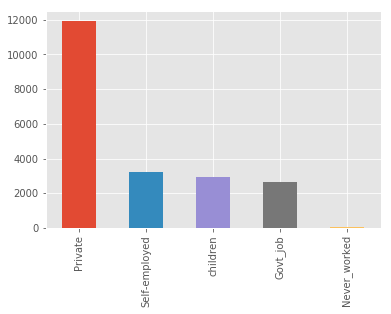

In [216]:
print(data_train['work_type'].value_counts())
print(data_train['work_type'].shape)
data_train['work_type'].value_counts().plot(kind='bar')

In [217]:
# #children - до 16
# #Поставить детям до 16 - children
# children = data_train.loc[(data_train['work_type'] != 'children') & (data_train['age'] <= 16)]
# children['work_type'].value_counts()

### 7. Residence type

Urban    10423
Rural    10405
Name: Residence_type, dtype: int64
(20828,)


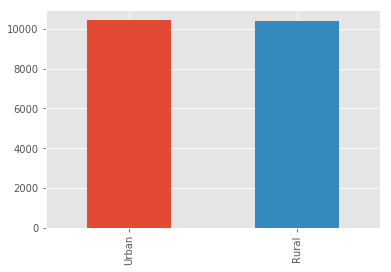

In [218]:
print(data_train['Residence_type'].value_counts())
print(data_train['Residence_type'].shape)
data_train['Residence_type'].value_counts().plot(kind='bar')

In [219]:
# Заменить на 1 (Urban) и 0 (Rural)

data_train['Residence_type'].replace(to_replace='Urban', value=1, inplace=True)
data_train['Residence_type'].replace(to_replace='Rural', value=0, inplace=True)
print(data_train['Residence_type'].value_counts())
data_test['Residence_type'].replace(to_replace='Urban', value=1, inplace=True)
data_test['Residence_type'].replace(to_replace='Rural', value=0, inplace=True)
print(data_test['Residence_type'].value_counts())

1    10423
0    10405
Name: Residence_type, dtype: int64
1    2610
0    2597
Name: Residence_type, dtype: int64


### 8. Avg glucose level

(20828,)


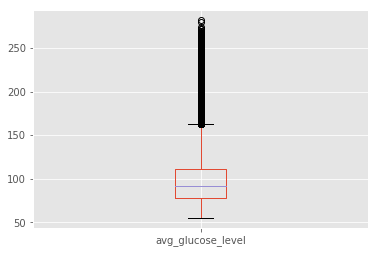

In [220]:
print(data_train['avg_glucose_level'].shape)
data_train[['avg_glucose_level']].plot.box()

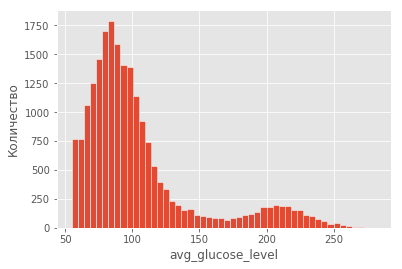

In [221]:
plt.hist(data_train['avg_glucose_level'], 50, edgecolor='white')
plt.xlabel('avg_glucose_level')
plt.ylabel('Количество')
plt.grid(True)

In [222]:
top_line_avg = data_train['avg_glucose_level'].quantile(0.75) + (1.5 * (data_train['avg_glucose_level'].quantile(0.75) - data_train['avg_glucose_level'].quantile(0.25)))
avg_outliers_null = data_train.loc[(data_train['avg_glucose_level'] > top_line_avg) & (data_train['stroke'] == 0)]
avg_outliers_null.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
11,47959,1,60.0,0,0,1,Private,0,210.70,25.5,formerly smoked,0
29,14720,1,22.0,0,0,1,Private,1,191.91,29.1,never smoked,0
36,62737,0,73.0,0,0,1,Private,0,201.44,27.8,never smoked,0
45,25014,1,4.0,0,0,0,children,0,201.73,20.6,NaN,0
47,52025,1,62.0,0,0,1,Private,0,176.04,34.0,formerly smoked,0


In [223]:
print(avg_outliers_null.shape)

(2322, 12)


In [224]:
data_train.drop(data_train[(data_train['avg_glucose_level'] > top_line_avg) & (data_train['stroke'] == 0)].index, inplace=True)

In [225]:
print('Размер данных тренировочной выборки: ', data_train['gender'].shape)
print('Размер данных тестовой выборки:      ', data_test['gender'].shape)
print('Целевая функция (1): ', data_train.loc[data_train['stroke'] == 1].shape)

Размер данных тренировочной выборки:  (18506,)
Размер данных тестовой выборки:       (5207,)
Целевая функция (1):  (376, 12)


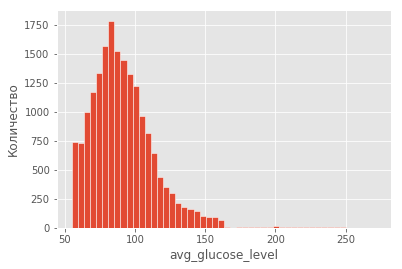

In [226]:
#Распределение немного поправилось
plt.hist(data_train['avg_glucose_level'], 50, edgecolor='white')
plt.xlabel('avg_glucose_level')
plt.ylabel('Количество')
plt.grid(True)

(18506,)


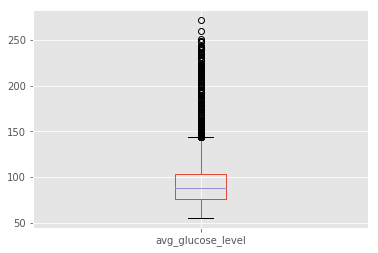

In [227]:
#  но выбросы все равно еще остаются.
print(data_train['avg_glucose_level'].shape)
data_train[['avg_glucose_level']].plot.box()

In [228]:
mean_avg_glucose_level = data_train['avg_glucose_level'].mean()
print('Среднее: ',mean_avg_glucose_level)
outliers_avg = data_train.loc[(data_train['avg_glucose_level'] > top_line_avg)]
print(outliers_avg.shape)


Среднее:  91.38534259159191
(117, 12)


In [229]:
data_train['avg_glucose_level'].replace(to_replace=list(outliers_avg['avg_glucose_level']), 
                                        value=mean_avg_glucose_level, inplace=True)

(18506,)


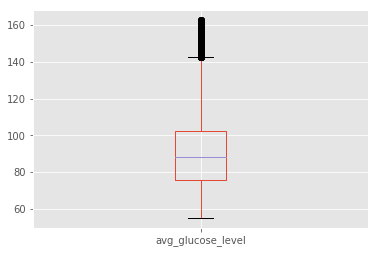

In [230]:
print(data_train['avg_glucose_level'].shape)
data_train[['avg_glucose_level']].plot.box()

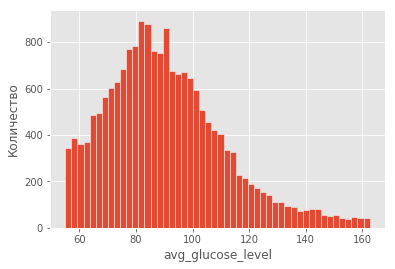

In [231]:
#Распределение немного поправилось
plt.hist(data_train['avg_glucose_level'], 50, edgecolor='white')
plt.xlabel('avg_glucose_level')
plt.ylabel('Количество')
plt.grid(True)

In [232]:
print('Размер данных тренировочной выборки: ', data_train['gender'].shape)
print('Размер данных тестовой выборки:      ', data_test['gender'].shape)
print('Целевая функция (1): ', data_train.loc[data_train['stroke'] == 1].shape)

Размер данных тренировочной выборки:  (18506,)
Размер данных тестовой выборки:       (5207,)
Целевая функция (1):  (376, 12)


### 9. bmi

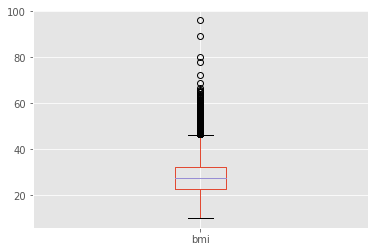

In [233]:
#~600 пропусков. Заполнить средним.
#Выбросы!
data_train['bmi'].plot.box()

In [234]:
top_line_bmi = data_train['bmi'].quantile(0.75) + (1.5 * (data_train['bmi'].quantile(0.75) - data_train['bmi'].quantile(0.25)))
down_line_bmi = data_train['bmi'].quantile(0.25) - (1.5 * (data_train['bmi'].quantile(0.75) - data_train['bmi'].quantile(0.25)))
print(top_line_bmi, down_line_bmi)

bmi_outliers_null = data_train.loc[(data_train['bmi'] > top_line_bmi) & 
                                   (data_train['stroke'] == 0)]
print(bmi_outliers_null.shape)
bmi_outliers_null.head()

46.300000000000004 8.699999999999998
(395, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
69,27209,1,23.0,0,0,0,Govt_job,1,98.27,46.4,never smoked,0
70,57258,0,58.0,0,0,0,Govt_job,0,58.86,49.5,NaN,0
73,49788,1,59.0,0,0,1,Private,0,61.63,46.6,smokes,0
78,22538,1,66.0,0,0,1,Private,1,91.96,46.8,formerly smoked,0
84,30545,0,55.0,0,0,1,Private,0,91.55,52.4,never smoked,0


In [235]:
data_train.drop(data_train[(data_train['bmi'] > top_line_bmi) & (data_train['stroke'] == 0)].index, inplace=True)

In [236]:
print('Размер данных тренировочной выборки: ', data_train['gender'].shape)
print('Размер данных тестовой выборки:      ', data_test['gender'].shape)
print('Целевая функция (1): ', data_train.loc[data_train['stroke'] == 1].shape)

Размер данных тренировочной выборки:  (18111,)
Размер данных тестовой выборки:       (5207,)
Целевая функция (1):  (376, 12)


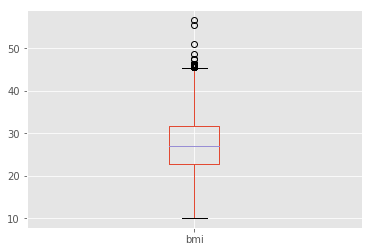

In [237]:
data_train['bmi'].plot.box()

C:\PROGRA~1\DATASC~1\virtual\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\PROGRA~1\DATASC~1\virtual\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


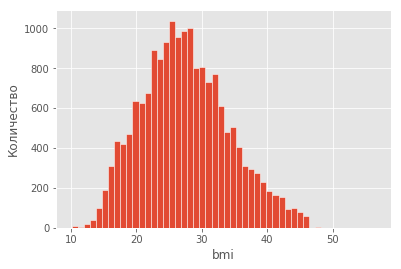

In [238]:
plt.hist(data_train['bmi'], 50, edgecolor='white')
plt.xlabel('bmi')
plt.ylabel('Количество')
plt.grid(True)

In [239]:
# Посмотреть записи с пропущенными значениями.
mean_bmi = data_train['bmi'].mean()
print('Среднее bmi: ', mean_bmi)
outliers_bmi = data_train.loc[(data_train['bmi'] > top_line_bmi)]
outliers_bmi.shape

Среднее bmi:  27.517132649010378


(6, 12)

In [240]:
data_train['bmi'].replace(to_replace=list(outliers_bmi['bmi']), 
                                        value=mean_bmi, inplace=True)

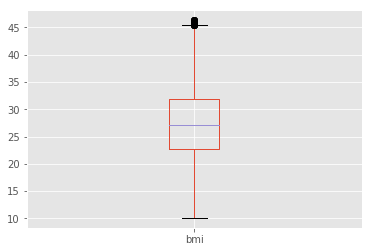

In [241]:
data_train['bmi'].plot.box()

In [242]:
# Заполняем пропуски средним значением
data_train['bmi'].fillna(mean_bmi, inplace=True)
print(data_train['bmi'].isna().sum())

data_test['bmi'].fillna(mean_bmi, inplace=True)
print(data_test['bmi'].isna().sum())

0
0


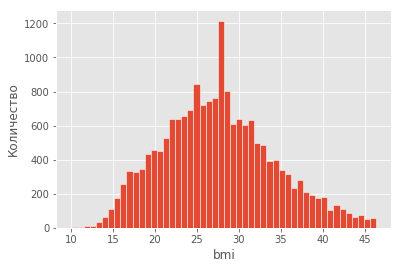

In [243]:
plt.hist(data_train['bmi'], 50, edgecolor='white')
plt.xlabel('bmi')
plt.ylabel('Количество')
plt.grid(True)

### 10. Smoking status

never smoked       6665
formerly smoked    2908
smokes             2630
Name: smoking_status, dtype: int64
(18111,)


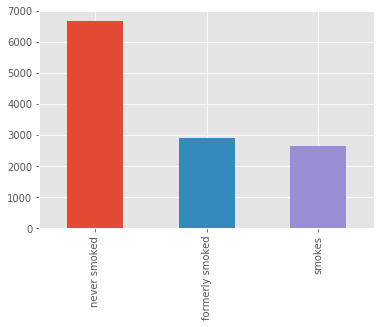

In [244]:
print(data_train['smoking_status'].value_counts())
print(data_train['smoking_status'].shape)
data_train['smoking_status'].value_counts().plot(kind='bar')

In [245]:
#Смотрим количество пропусков и находим сколько из них принадлежат к классу "0"
data_train['smoking_status'].isna().sum()
data_train['smoking_status'].fillna('NaN', inplace=True)
data_train.loc[(data_train['smoking_status'] == 'NaN') & (data_train['stroke'] == 0)].shape

(5843, 12)

In [246]:
data_test['smoking_status'].isna().sum()
data_test['smoking_status'].fillna('NaN', inplace=True)

In [247]:
# Удаляем эти записи, чтобы еще немного сбалансировать классы
data_train.drop(data_train[(data_train['smoking_status'] == 'NaN') & (data_train['stroke'] == 0)].index, inplace=True)

In [248]:
print('Размер данных тренировочной выборки: ', data_train['gender'].shape)
print('Размер данных тестовой выборки:      ', data_test['gender'].shape)
print('Целевая функция (1): ', data_train.loc[data_train['stroke'] == 1].shape)

Размер данных тренировочной выборки:  (12268,)
Размер данных тестовой выборки:       (5207,)
Целевая функция (1):  (376, 12)


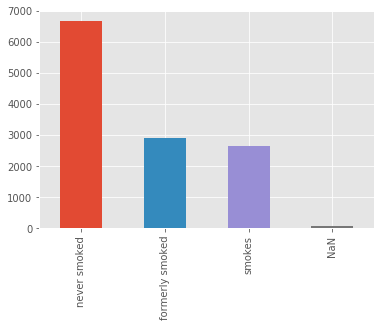

In [249]:
data_train['smoking_status'].value_counts().plot(kind='bar')

In [250]:
#Заменяем модой пропуски в smoking status
smoking_status_mode = data_train['smoking_status'].mode()
data_train['smoking_status'].replace(to_replace='NaN', value=smoking_status_mode[0], inplace=True)
print(data_train['smoking_status'].isna().sum())

data_test['smoking_status'].replace(to_replace='NaN', value=smoking_status_mode[0], inplace=True)
print(data_test['smoking_status'].isna().sum())




0
0


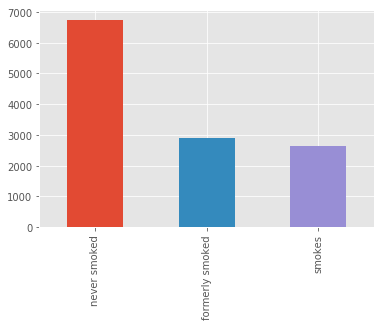

In [251]:
data_train['smoking_status'].value_counts().plot(kind='bar')

### 11. Stroke

0    11892
1      376
Name: stroke, dtype: int64
(12268,)


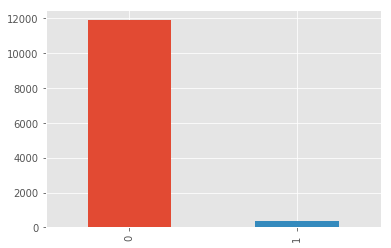

In [252]:
#Классы несбалансированы.
print(data_train['stroke'].value_counts())
print(data_train['stroke'].shape)
data_train['stroke'].value_counts().plot(kind='bar')

## Корреляционная матрица

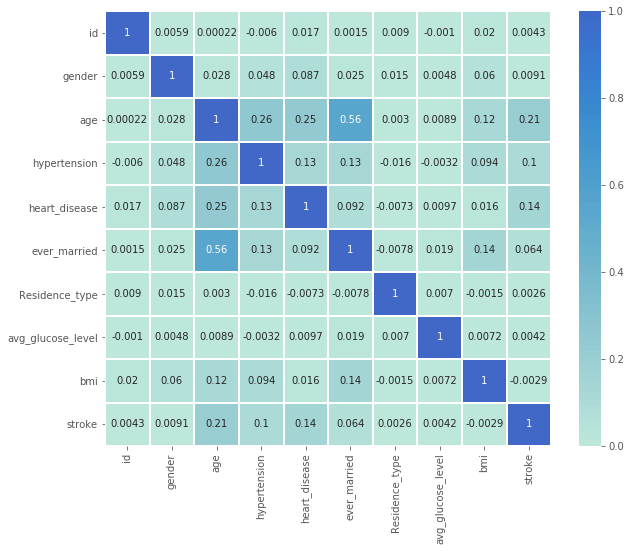

In [253]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data_train.corr(), center=2, annot=True, linewidths=1, vmin=0, vmax=1, fmt='.2g')

In [257]:
data_train_ohe = pd.get_dummies(data_train[['gender', 'age', 'hypertension', 'heart_disease',
                           'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']])
print(data_train_ohe.shape)
data_train_ohe.head()

data_test_ohe = pd.get_dummies(data_test[['gender', 'age', 'hypertension', 'heart_disease', 
                           'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']])
print(data_test_ohe.shape)
data_test_ohe.head()

(12268, 10)
(5207, 10)


,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,17.0,0,0,1,133.19,17.8,0,1,0
1,0,8.0,0,0,1,92.53,17.6,0,1,0
2,0,69.0,0,0,1,105.58,26.9,0,1,0
3,0,48.0,0,0,1,67.39,25.6,0,1,0
4,0,10.0,0,0,0,91.60,29.1,0,1,0


## 2. Обучение

In [258]:
X_train = data_train_ohe.values
y_train = data_train['stroke'].values

X_test = data_test_ohe.values
y_test = data_test['stroke'].values

In [315]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

### 2.1. Деревья решений

Accuracy: 0.59516
Recall: 0.90426


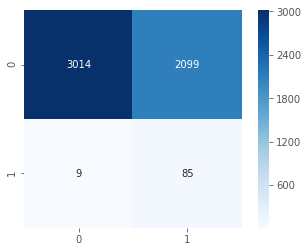

In [265]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=228, class_weight='balanced')
dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('Recall: %.5f' % recall_score(y_test, y_pred))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test , y_pred=y_pred)

#Матрица ошибок
sns.heatmap(cm, annot=True, fmt='0g', cmap='Blues', square=True, cbar=True)

# criterion=gini, max_depth=3
# Accuracy: 0.69138
# Recall: 0.78723

# criterion=entropy, max_depth=1
# Accuracy: 0.59516
# Recall: 0.90426

### 2.2. Случайный лес

Accuracy: 0.59516
Recall: 0.90426


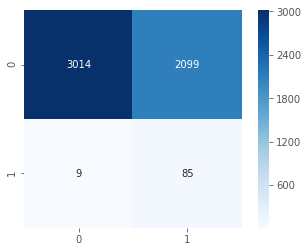

In [272]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1, criterion='entropy', max_depth=1, random_state=228, 
                            bootstrap=True, class_weight='balanced_subsample')

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred) )
print('Recall: %.5f' % recall_score(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

sns.heatmap(cm, annot=True, fmt='0g', cmap='Blues', square=True, cbar=True)

# СО всеми даннными
# n_estimators=14, criterion='entropy', max_depth=3
# Accuracy: 0.71020
# Recall: 0.82979

# n_estimators=16, criterion='entropy', max_depth=2
# Accuracy: 0.63338
# Recall: 0.88298
    
# С выбранными RF
# n_estimators=5, criterion='entropy', max_depth=1

# n_estimators=5, max_depth=1
# Accuracy: 0.60880
# Recall: 0.90426

#New
# n_estimators=1, max_depth=1
# Accuracy: 0.59516
# Recall: 0.90426

### 2.3. SVC

In [273]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=228, class_weight='balanced')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('Recall: %.5f' % recall_score(y_test, y_pred))

# svm = SVC(kernel='linear', C=1.0, random_state=228)
# svm.fit(X_train_std, y_train)

Accuracy: 0.73516
Recall: 0.73404


## 3. Обучение со стандартизированными данными

In [300]:
# Стандартизация 
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler() 
ss.fit(X_train)

X_train_std = ss.transform(X_train) 
X_test_std = ss.transform(X_test) 

### 3.1. Деревья решений

In [301]:
dtc = dtc.fit(X_train_std, y_train)

y_pred = dtc.predict(X_test_std)

print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('Recall: %.5f' % recall_score(y_test, y_pred))

Accuracy: 0.59516
Recall: 0.90426


### 3.2. Случайный лес

In [302]:
rf = RandomForestClassifier(n_estimators=1, criterion='entropy', max_depth=1, random_state=228, 
                            bootstrap=True, class_weight='balanced_subsample')

rf.fit(X_train_std, y_train)

y_pred = rf.predict(X_test_std)
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred) )
print('Recall: %.5f' % recall_score(y_test, y_pred))

Accuracy: 0.59516
Recall: 0.90426


### 3.3. AdaBoost

In [303]:
#Скомбинировать 30 признаков в 2 
from sklearn import decomposition

pca = decomposition.PCA(n_components=2, random_state=228)
pca.fit(X_train_std)
X_train_2d = pca.transform(X_train_std)
X_test_2d = pca.transform(X_test_std)

print(X_train_2d.shape, X_test_2d.shape)

(12268, 2) (5207, 2)


In [304]:
from sklearn.ensemble import AdaBoostClassifier
#Указываем слабый классификатор для AdaBoostClassifier

abdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), #100% - max_depth=5, n_estimators=16
                          algorithm="SAMME", 
                          n_estimators=16, 
                          random_state=228)

abdt = abdt.fit(X_train_2d, y_train)

#присвоим результат предсказания на тестовых данных
y_pred = abdt.predict(X_test_2d)

#Считаем accuracy
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred) )
print('Recall: %.5f' % recall_score(y_test, y_pred))

Accuracy: 0.98195
Recall: 0.00000


### 3.4. SVC

In [306]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=228, class_weight='balanced')
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('Recall: %.5f' % recall_score(y_test, y_pred))

# svm = SVC(kernel='linear', C=1.0, random_state=228)
# svm.fit(X_train_std, y_train)

Accuracy: 0.74323
Recall: 0.73404


## 4. Обучение с отобранными признаками

In [289]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = data_train_ohe.columns[1:]
forest = RandomForestClassifier(n_estimators=100,
                                random_state=228,
                                n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1] - 1):
    print("%2d) %-*s %f" % (f + 1, 30,
    feat_labels[f],
    importances[indices[f]]))

 1) age                            0.427157
 2) hypertension                   0.243948
 3) heart_disease                  0.203331
 4) Residence_type                 0.026868
 5) avg_glucose_level              0.025795
 6) bmi                            0.019852
 7) smoking_status_formerly smoked 0.019518
 8) smoking_status_never smoked    0.014110
 9) smoking_status_smokes          0.010410


In [290]:
data_train_ohe2 = pd.get_dummies(data_train[['age', 'hypertension', 'heart_disease']])
print(data_train_ohe2.shape)
data_train_ohe.head()

data_test_ohe2 = pd.get_dummies(data_test[['age', 'hypertension', 'heart_disease']])
print(data_test_ohe2.shape)
data_test_ohe2.head()

(12268, 3)
(5207, 3)


,age,hypertension,heart_disease
0,17.0,0,0
1,8.0,0,0
2,69.0,0,0
3,48.0,0,0
4,10.0,0,0


In [291]:
X_train2 = data_train_ohe2.values
y_train2 = data_train['stroke'].values

X_test2 = data_test_ohe2.values
y_test2 = data_test['stroke'].values

data_train_ohe2.shape

(12268, 3)

### 4.1. Деревья решений

In [294]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=228, class_weight='balanced')
dtc = dtc.fit(X_train2, y_train2)

y_pred2 = dtc.predict(X_test2)

print('Accuracy: %.5f' % accuracy_score(y_test2, y_pred2))
print('Recall: %.5f' % recall_score(y_test2, y_pred2))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test2, y_pred=y_pred2)

Accuracy: 0.59516
Recall: 0.90426


### 4.2. Случайный лес

In [295]:
rf = RandomForestClassifier(n_estimators=1, criterion='entropy', max_depth=1, random_state=228, 
                            bootstrap=True, class_weight='balanced_subsample')

rf.fit(X_train2, y_train2)

y_pred = rf.predict(X_test2)
print('Accuracy: %.5f' % accuracy_score(y_test2, y_pred2) )
print('Recall: %.5f' % recall_score(y_test2, y_pred2))

Accuracy: 0.59516
Recall: 0.90426


### 4.3. SVC

In [296]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=228, class_weight='balanced')
svm.fit(X_train2, y_train2)

y_pred2 = svm.predict(X_test2)
print('Accuracy: %.5f' % accuracy_score(y_test2, y_pred2))
print('Recall: %.5f' % recall_score(y_test2, y_pred2))

Accuracy: 0.75456
Recall: 0.75532


## 5. Обучение с кросс-валидацией

In [339]:
# Получение обучающих и валидационных выборок для кросс-валидации
from sklearn.model_selection import StratifiedKFold

folds_num = 5
kf = StratifiedKFold(n_splits=folds_num, shuffle=True, random_state=228)
ss = StandardScaler()

X_trains, X_vals, y_trains, y_vals = [], [], [], []
for train_idx, val_idx in kf.split(X_train, y_train):
    X_trains.append(ss.fit_transform(X_train[train_idx]))
    X_vals.append(ss.transform(X_train[val_idx]))
    y_trains.append(y_train[train_idx])
    y_vals.append(y_train[val_idx])

In [342]:
for i in range(len(X_trains)):
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test_std)
    print('Accuracy: %.5f' % accuracy_score(y_test, y_pred) )
    print('Recall: %.5f' % recall_score(y_test, y_pred))



Accuracy: 0.91358
Recall: 0.19149
Accuracy: 0.91358
Recall: 0.19149
Accuracy: 0.91358
Recall: 0.19149
Accuracy: 0.91358
Recall: 0.19149
Accuracy: 0.91358
Recall: 0.19149


## 6. PCA

In [322]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X_train_std.shape[1], random_state=228)
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=228,
  svd_solver='auto', tol=0.0, whiten=False)

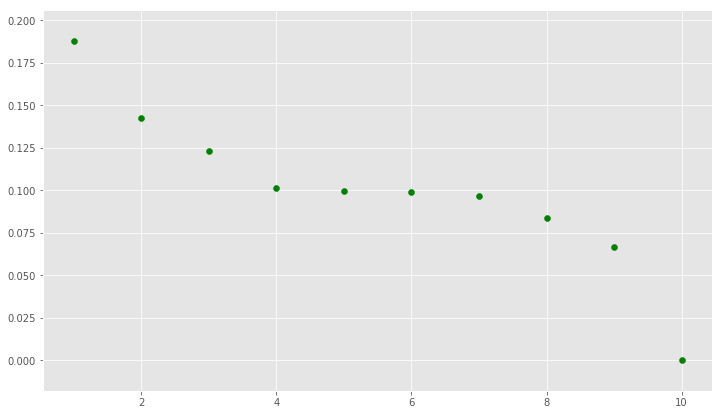

In [330]:
import matplotlib.pyplot as plt

%matplotlib inline

x_axis = np.arange(1, 11)

plt.figure(figsize=(12, 7))
plt.scatter(x_axis, pca.explained_variance_ratio_, color='g')
plt.grid(True)



In [331]:
pca.explained_variance_ratio_[:10].sum()

1.0

In [332]:
pca.set_params(n_components=10)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=228,
  svd_solver='auto', tol=0.0, whiten=False)

In [333]:
pca.explained_variance_ratio_.sum()

0.9999999999999998

In [334]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [336]:
for i in range(1,25):
    for j in range(1,10):
        print('n_estimators=' + str(i) + ', max_depth=' + str(j))

        rf = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=j, random_state=228, 
                                    bootstrap=True, class_weight='balanced_subsample')

        rf.fit(X_train_pca, y_train)

        y_pred = rf.predict(X_test_pca)
        print('Accuracy: %.5f' % accuracy_score(y_test, y_pred) )
        print('Recall: %.5f' % recall_score(y_test, y_pred))

n_estimators=1, max_depth=1
Accuracy: 0.65508
Recall: 0.61702
n_estimators=1, max_depth=2
Accuracy: 0.65508
Recall: 0.61702
n_estimators=1, max_depth=3
Accuracy: 0.77569
Recall: 0.55319
n_estimators=1, max_depth=4
Accuracy: 0.71231
Recall: 0.65957
n_estimators=1, max_depth=5
Accuracy: 0.74304
Recall: 0.47872
n_estimators=1, max_depth=6
Accuracy: 0.75399
Recall: 0.48936
n_estimators=1, max_depth=7
Accuracy: 0.79912
Recall: 0.39362
n_estimators=1, max_depth=8
Accuracy: 0.86134
Recall: 0.29787
n_estimators=1, max_depth=9
Accuracy: 0.84290
Recall: 0.36170
n_estimators=2, max_depth=1
Accuracy: 0.65508
Recall: 0.61702
n_estimators=2, max_depth=2
Accuracy: 0.70905
Recall: 0.57447
n_estimators=2, max_depth=3
Accuracy: 0.72537
Recall: 0.60638
n_estimators=2, max_depth=4
Accuracy: 0.74169
Recall: 0.55319
n_estimators=2, max_depth=5
Accuracy: 0.82543
Recall: 0.35106
n_estimators=2, max_depth=6
Accuracy: 0.82370
Recall: 0.41489
n_estimators=2, max_depth=7
Accuracy: 0.87210
Recall: 0.32979
n_estima